## Improving Computer Vision Using Convolutions

### Fashion MNIST using Deep Neural Network

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels), (test_images,test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [3]:
training_images.shape

(60000, 28, 28)

In [4]:
training_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
training_images = training_images/255
test_images = test_images/255

In [11]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4941 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3735 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3354 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2969 - accuracy: 0.8888


In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  100480    
_________________________________________________________________
dense_7 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
test_loss = model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8795


## ---------------------------------------------------

### Fashion MNIST with Convolution Neural Network

In [31]:
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

In [38]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [39]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4429 - accuracy: 0.8407
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3012 - accuracy: 0.8898
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2550 - accuracy: 0.9060
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2213 - accuracy: 0.9176
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1961 - accuracy: 0.9271


In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [40]:
test_loss = model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2567 - accuracy: 0.9032


Validation accuracy is 90.32%

We can increase the number of epochs but it could lead to overfitting.

## Visualizing the convolutions and pooling

In [41]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


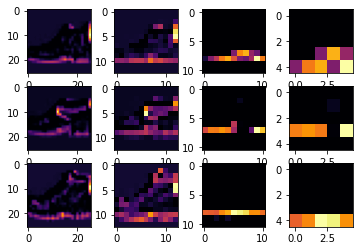

In [47]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)

first = 0
second = 23
third = 28
convolution_number = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input,
                                        outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[first].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : , : , convolution_number], cmap = 'inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(test_images[second].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, : , : , convolution_number], cmap = 'inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(test_images[third].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, : , : , convolution_number], cmap = 'inferno')
    axarr[2,x].grid(False)
    